# 05. forecast(시계열)

## 1. 배경 및 설치

- 설치
- https://facebook.github.io/prophet/
    1.  윈도우 유저는 Visual C++ Build Tool 먼저 설치해야함
    - http://visualstudio.microsoft.com/visual-cpp-build-tools/
    3.  conda install pandas-datareader
    4.  conda install -c conda-forge fbprophet / pip install fbprophet
    

In [43]:
from pandas_datareader import data
from prophet import Prophet


---

## 함수(def) 의 기초

In [44]:
def test_def(a,b):
    return a + b


In [45]:
c= test_def(2,3)
c

5

In [46]:
5 + c

10

In [47]:
def test_deff(a,b):
    print(a + b)

In [48]:
c = test_deff(2,3)
c

5


In [49]:
5 + c

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

- 가장 기초적인 모양의 def 정의
- 이름(test_def) 과 입력 인자 (a,b)를 정해준다 
- 출력(return)을 작성

In [50]:
a = 1 #전역변수

def edit_a(i):
    a=i # 지역변수

In [51]:
edit_a(2)

In [52]:
a

1

In [53]:
a =1 

def edit_a(i):
    global a 
    a=i # 지역변수

In [54]:
edit_a(2)

In [55]:
a

2

- global 변수를 def 내에서 사용하고 싶다면 global 로 선언

- def 내에서의 변수와 밖에서 변수는 같은 이름이어도 같은 것이 아니다

$$ y =asin(2\pi ft + t_0) + b $$

In [56]:
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

In [57]:
def plotSinWave(**kwargs):
    """
    plot sine wave
    y = a sin(2 pi ft + t_0) + b

    """
    endTime = kwargs.get('endTime',1)
    sampleTime = kwargs.get('sampleTime',0.01)
    amp = kwargs.get('amp',1)
    freq = kwargs.get('freq',1)
    startTime =kwargs.get('startTime',0)
    bias = kwargs.get('bias',0)
    figsize = kwargs.get('figsize',(12,6))
    
    time = np.arange(startTime, endTime, sampleTime)
    result = amp * np.sin(2 * np.pi * freq * time + startTime) + bias

    plt.figure(figsize=(12,6))
    plt.plot(time,result)
    plt.grid(True)
    plt.xlabel('time')
    plt.ylabel('sin')
    plt.title(str(amp) + 'sin(2*pi' + str(freq) + '*t+' + str(startTime) + ')+' + str(bias)) 
    plt.show()
    

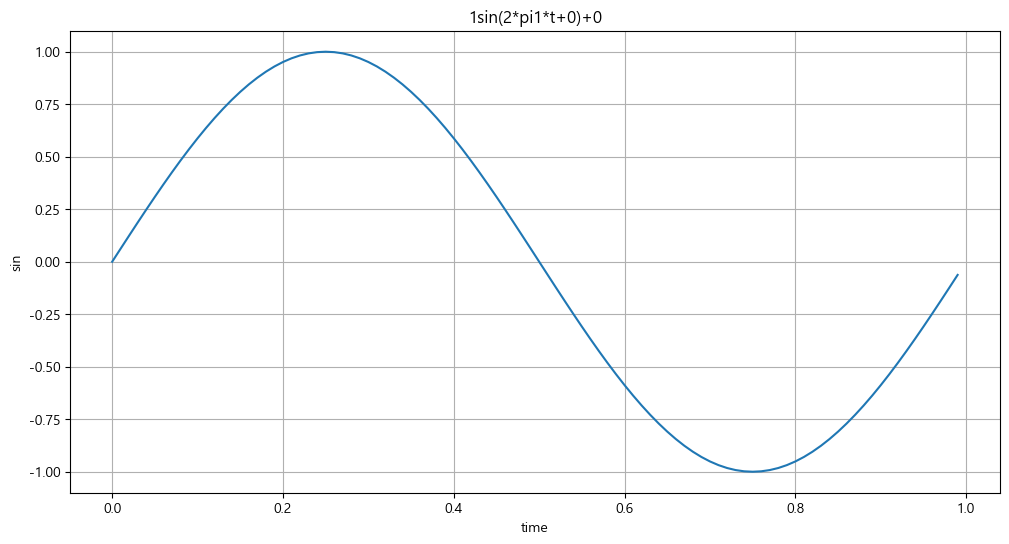

In [58]:
plotSinWave()

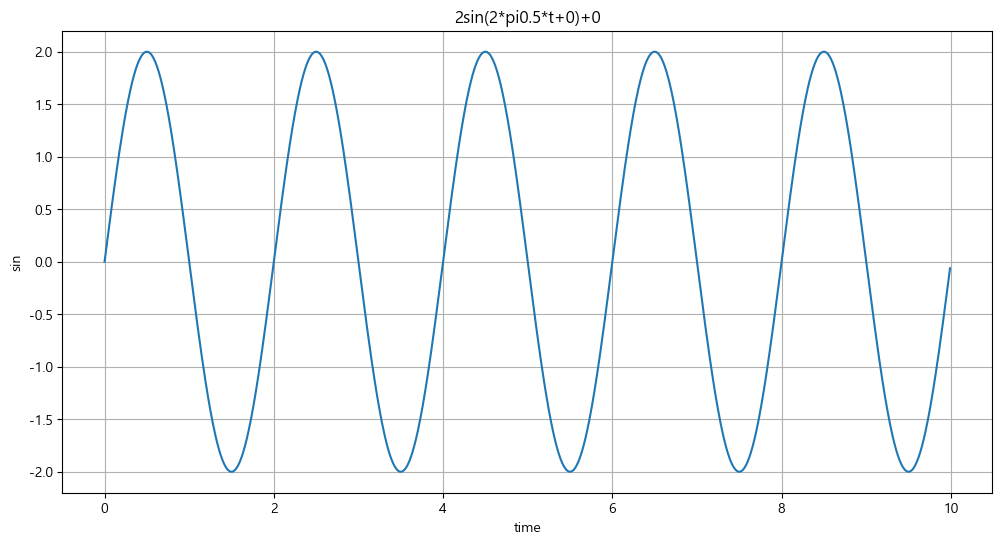

In [59]:
plotSinWave(amp=2, freq=0.5, endTime=10)

## 내가 만든 함수 import 
- drawSinWave.py

In [60]:
# 주피터 노트북에서 모듈화 하기
%%writefile ./drawSinWave.py

import numpy as np
import matplotlib.pyplot as plt 

def plotSinWave(**kwargs):
    """
    plot sine wave
    y = a sin(2 pi ft + t_0) + b

    """
    endTime = kwargs.get('endTime',1)
    sampleTime = kwargs.get('sampleTime',0.01)
    amp = kwargs.get('amp',1)
    freq = kwargs.get('freq',1)
    startTime =kwargs.get('startTime',0)
    bias = kwargs.get('bias',0)
    figsize = kwargs.get('figsize',(12,6))
    
    time = np.arange(startTime, endTime, sampleTime)
    result = amp * np.sin(2 * np.pi * freq * time + startTime) + bias

    plt.figure(figsize=(12,6))
    plt.plot(time,result)
    plt.grid(True)
    plt.xlabel('time')
    plt.ylabel('sin')
    plt.title(str(amp) + 'sin(2*pi' + str(freq) + '*t+' + str(startTime) + ')+' + str(bias)) 
    plt.show()
    

UsageError: Line magic function `%%writefile` not found.


In [61]:
#vscode에 있는 모듈 임포트
import drawSinWave as ds

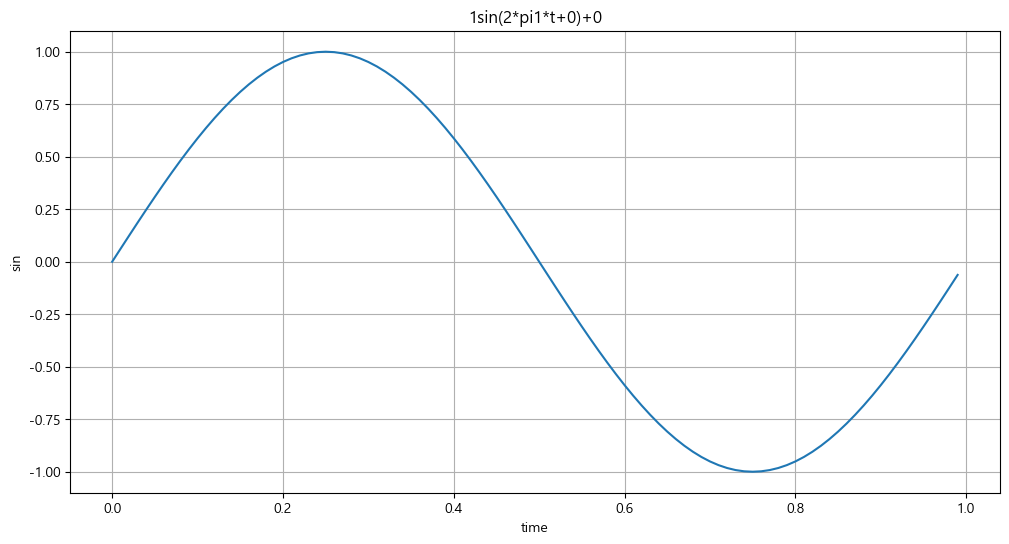

In [62]:
ds.plotSinWave()

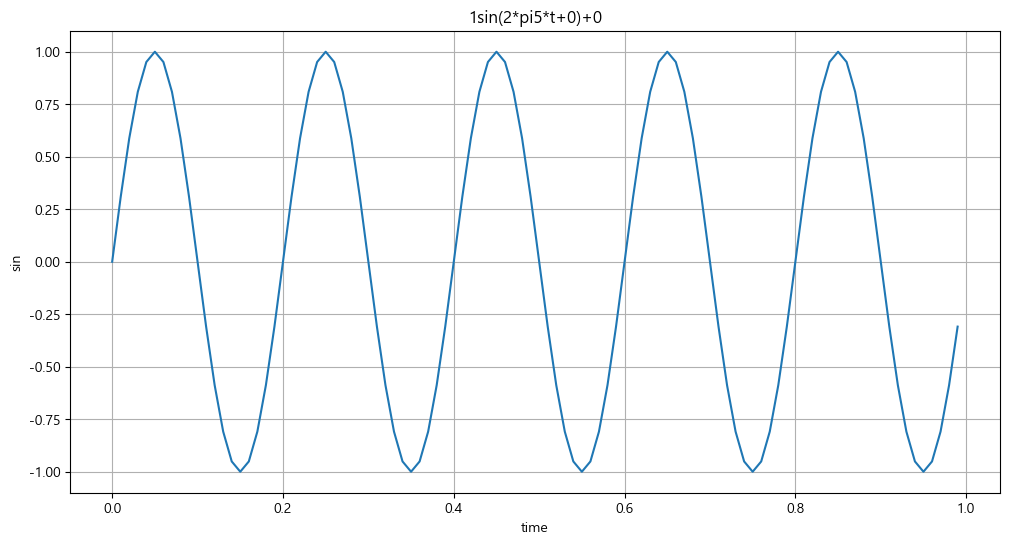

In [63]:
ds.plotSinWave(freq=5)

## 그래프 한글 설정

In [64]:
import set_matlotlib_hangul

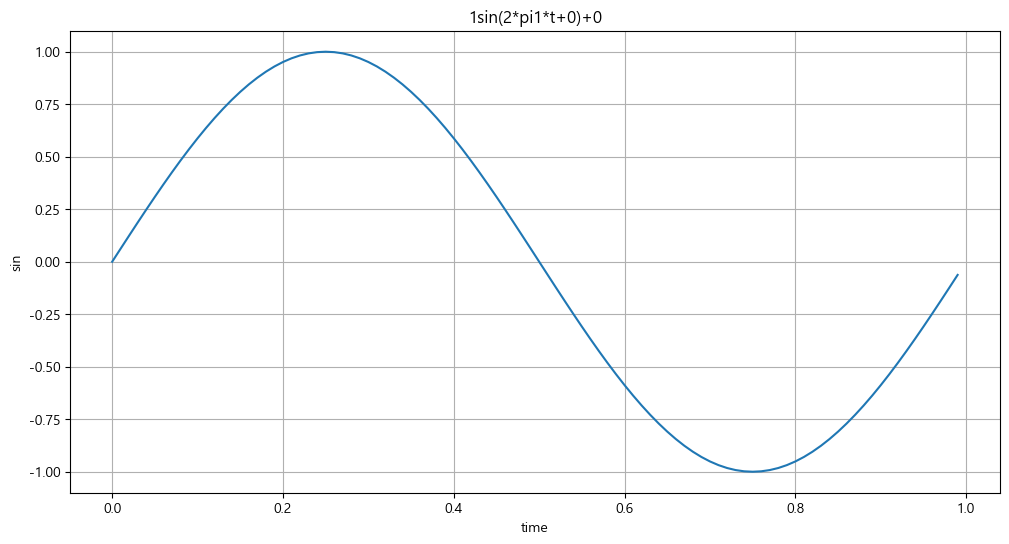

In [65]:
ds.plotSinWave()

Text(0.5, 1.0, '한글')

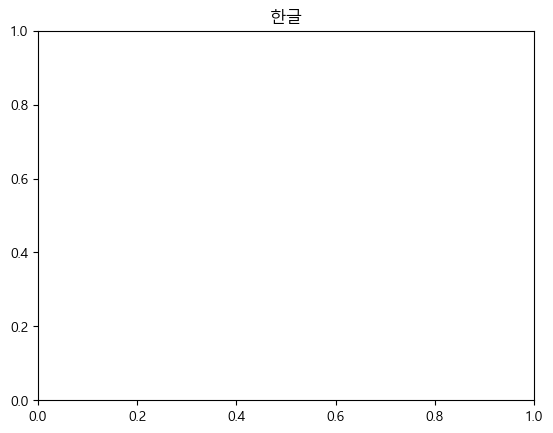

In [66]:
plt.title('한글')

---

## 2. Fbprophet 기초

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

1)

In [68]:
time = np.linspace(0, 1, 365*2)
result = np.sin(2*np.pi*12*time)
ds = pd.date_range('2018-01-01', periods=365*2, freq='D')
df = pd.DataFrame({'ds': ds, 'y' : result})
df.head()

,ds,y
0,2018-01-01,0.000000
1,2018-01-02,0.103243
2,2018-01-03,0.205382
3,2018-01-04,0.305326
4,2018-01-05,0.402007


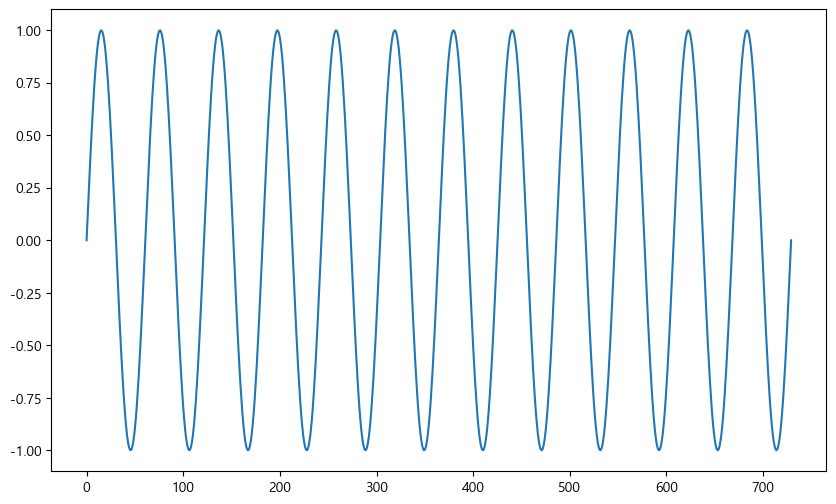

In [69]:
df['y'].plot(figsize=(10,6));

In [72]:
from prophet import Prophet
m = Prophet(stan_backend=,yearly_seasonality=True,daily_seasonality=True)
m.fit(df);

ValueError: Unknown stan backend: True

In [38]:
futer = m.make_future_dataframe(period=30)
forecast = m.predict(future)

NameError: name 'm' is not defined

In [39]:
m.plot(forecast)

NameError: name 'm' is not defined

2)

In [ ]:
time = np.linspace(0, 1, 365*2)
result = np.sin(2*np.pi*12*time) + time # 편향을 살짝 넣어주기
ds = pd.date_range('2018-01-01', periods=365*2, freq='D')
df = pd.DataFrame({'ds': ds, 'y' : result})
df.head()

In [ ]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True) # 옵션값 설정
m.fit(df) #만들어놓은 데이터프레임으로 학습시키기
futer = m.make_future_dataframe(period=30) #앞으로 30일간 데이터 예측해줘
forecast = m.predict(future) #앞으로 30일간 데이터 예측해줘
m.plot(df) #시각화


3)

In [ ]:
time = np.linspace(0, 1, 365*2)
result = np.sin(2*np.pi*12*time) + time + np.random.randn(365*2) # 노이즈 살짝 넣어주기
ds = pd.date_range('2018-01-01', periods=365*2, freq='D')
df = pd.DataFrame({'ds': ds, 'y' : result})
df.head()

In [ ]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True) # 옵션값 설정
m.fit(df) #만들어놓은 데이터프레임으로 학습시키기
futer = m.make_future_dataframe(period=30) #앞으로 30일간 데이터 예측해줘
forecast = m.predict(future) #앞으로 30일간 데이터 예측해줘
m.plot(df) #시각화

## 3. 시계열 데이터 실전 이용해보기

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web

from datetime import datetime
# from fbprophet import Prophet

%matplotlib inline


In [14]:
pinkwink_web = pd.read_csv('../data/05_PinkWink_Web_Traffic.csv',
                           encoding= 'utf-8',
                           thousands=',',
                           names=['date','hit'],
                           index_col=0)
pinkwink_web=pinkwink_web[pinkwink_web['hit'].notnull()]

In [15]:
pinkwink_web

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0
...,...
17. 6. 26.,1309.0
17. 6. 27.,1436.0
17. 6. 28.,1387.0


<Axes: xlabel='date'>

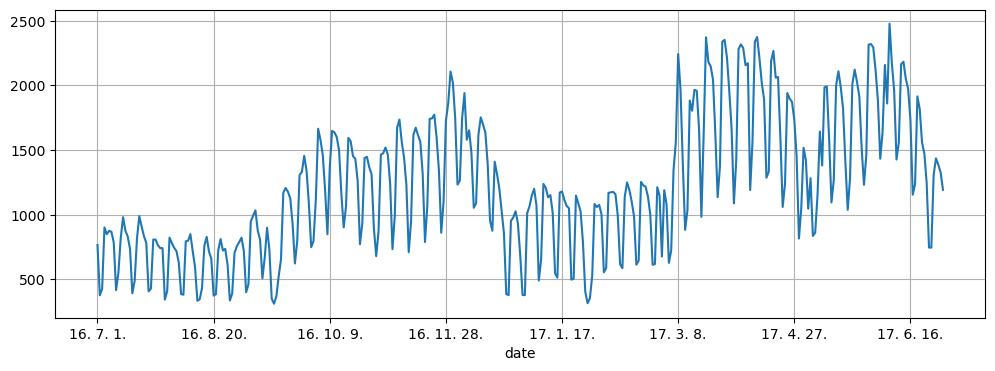

In [16]:
#전체 데이터 그려보기
pinkwink_web['hit'].plot(figsize=(12,4), grid=True)

In [20]:
# trend분석을 시각화하기 위한 x축 값 만들기
time= np.arange(0,len(pinkwink_web))
traffic = pinkwink_web['hit'].values
fx = np.linspace(0, time[-1], 1000) #주어진 범위에서 일정한 간격으로 수열을 생성

In [29]:
# 에러를 계산할 함수
def error(f,x,y):
    return np.sqrt(np.mean((f(x) - y) ** 2))

In [31]:
f1p = np.polyfit(time,traffic,1)
f1=np.poly1d(f1p)

f2p = np.polyfit(time,traffic,2)
f2=np.poly1d(f2p)

f3p = np.polyfit(time,traffic,3)
f3=np.poly1d(f3p)

f15p = np.polyfit(time,traffic,15)
f15=np.poly1d(f15p)

In [32]:
print(error(f1,time,traffic))
print(error(f2,time,traffic))
print(error(f3,time,traffic))
print(error(f15,time,traffic))

430.85973081109626
430.6284101894695
429.53280466762925
330.47773079342267


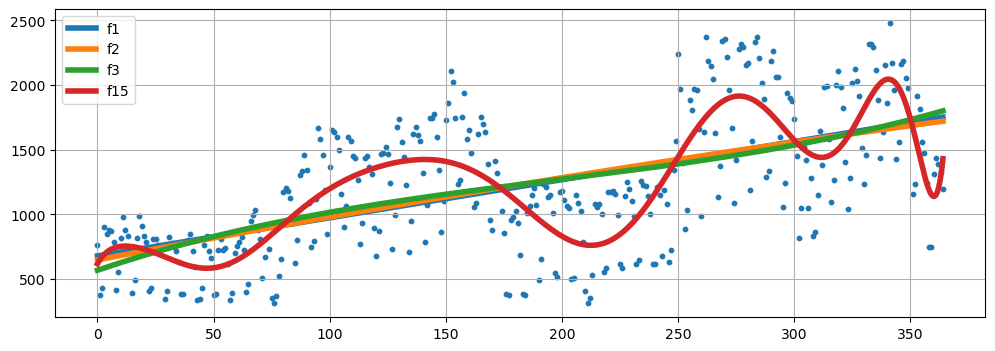

In [35]:
plt.figure(figsize=(12,4))
plt.scatter(time,traffic,s=10)
plt.plot(fx,f1(fx),lw=4,label='f1')
plt.plot(fx,f2(fx),lw=4,label='f2')
plt.plot(fx,f3(fx),lw=4,label='f3')
plt.plot(fx,f15(fx),lw=4,label='f15')
plt.grid(True)
plt.legend(loc=2)
plt.show()


In [54]:
df = pd.DataFrame({'ds':pinkwink_web.index, 'y' : pinkwink_web['hit']})
df.reset_index(inplace=True)
df['ds']=pd.to_datetime(df['ds'], format='%y. %m. %d.') #띄어쓰기 조심...
df

,date,ds,y
0,16. 7. 1.,2016-07-01,766.0
1,16. 7. 2.,2016-07-02,377.0
2,16. 7. 3.,2016-07-03,427.0
3,16. 7. 4.,2016-07-04,902.0
4,16. 7. 5.,2016-07-05,850.0
...,...,...,...
360,17. 6. 26.,2017-06-26,1309.0
361,17. 6. 27.,2017-06-27,1436.0
362,17. 6. 28.,2017-06-28,1387.0
363,17. 6. 29.,2017-06-29,1328.0


In [80]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)

AttributeError: 'Prophet' object has no attribute 'stan_backend'

In [56]:
# 60일에 해당하는 데이터 예측
future= m.make_future_dataframe(period=60)
future.tail()

NameError: name 'm' is not defined

In [57]:
# 예측 결과는 상한/하한의 범위를 포함해서 얻어진다
forecast= m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

NameError: name 'm' is not defined

In [58]:
m.plot(forecast)

NameError: name 'm' is not defined

In [ ]:
m.plot_components(forecast)